# Practica 6 - Estadistica Descriptiva 

Solucion en R (por honi): https://github.com/honi/uba-probabilidad-y-estadistica/blob/main/Soluciones/Pr%C3%A1ctica6.ipynb

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tabulate import tabulate

## [1] Ejercicio Fabrica de alfajores

Una fabrica de alfajores tiene dos sedes: una en Quilmes y la otra en Pilar. Cada sede empaqueta sus alfajores en cajas con 4 unidades. 

Denotemos con $X$ a la variable aleatoria que indica el numero de alfajores defectuosos en una caja y con $Y$ a la variable aleatoria que indica la sede de la que proviene la caja, Quilmes(Y = 0) o Pilar (Y = 1).

El archivo alfajores.txt contiene datos que se obtienen al examinar cajas al azar producidas por la fabrica. Es decir, realizaciones del vector $(X, Y)$.
Supongamos que se seleccionaron $n=500$ cajas al azar producidas por la fabrica.

> $X: $ # alfajores defectuosos de una caja de 4 alfajores

> $Y: $ sede de la caja (0: Quilmes, 1: Pilar)


In [2]:
datos_alfajores:list = []
with open("datasets/alfajores.txt", "r") as file:
    for line in file.readlines()[1:]:
        id, x, y = line.split(" ")
        x = int(x)
        y = int(y)
        datos_alfajores.append((x, y))

dataset_alfajores:pd.DataFrame = pd.DataFrame(data=datos_alfajores, columns=['defectuosos', 'sede'])

In [3]:
dataset_alfajores.head(5)

,defectuosos,sede
0,3,1
1,3,1
2,3,1
3,1,0
4,4,1


[1.a] La probabilidad de que una caja provenga de la sede Quilmes.

Para estimar la probabilidad de que un alfajor venga de Quilmes con la muestra se miran las proporciones en la muestra.
$P({Quilmes}) = \frac{len (Quilmes)}{len (Dataset)}$

In [4]:
p_quilmes = (len(dataset_alfajores) - dataset_alfajores['sede'].sum()) / len(dataset_alfajores)
p_quilmes

0.256

In [5]:
p_pilar = 1 - p_quilmes

[1.b] La probabilidad de que una caja este producida en Quilmes y tenga 3 alfajores defectuosos.

$P(Quilmes \cap X=3) = P(X=3|Quilmes) * P(Quilmes) = \frac{len(Quilmes\cap X=3)}{len(Dataset)}$ 

In [6]:
cajasDeQuilmes:pd.DataFrame = dataset_alfajores[dataset_alfajores.sede == 0]
cajasDeQuilmesCon3Defectuosos:pd.DataFrame = cajasDeQuilmes[cajasDeQuilmes.defectuosos == 3]

# via 1
p_quilmes_y_3_defectuosos_v1 = len(cajasDeQuilmesCon3Defectuosos) / len(dataset_alfajores)
print('v1: ', p_quilmes_y_3_defectuosos_v1)

# via 2
p_3_defectuosos_cond_quilmes = len(cajasDeQuilmesCon3Defectuosos) / len(cajasDeQuilmes)
p_quilmes_y_3_defectuosos_v2 = p_3_defectuosos_cond_quilmes * p_quilmes
print('v2: ', p_quilmes_y_3_defectuosos_v2)

v1:  0.018
v2:  0.018000000000000002


[1.c] La funcion de probabilidad conjunta del vector $(X, Y)$

In [7]:
def P(x:int, y:int) -> float:
    # probabilidad conjunta aproximada segun la # apariciones en la muestra
    if not ((0 <= x <= 4) and (y in [0,1])):
        return 0
    return len(dataset_alfajores[dataset_alfajores.sede == y][dataset_alfajores.defectuosos == x]) / len(dataset_alfajores)

In [8]:
proba_conjunta_alfajores = [['X \ Y', 0, 1], 
                            [0, P(0,0), P(0,1)], 
                            [1, P(1,0), P(1,1)], 
                            [2, P(2,0), P(2,1)],
                            [3, P(3,0), P(3,1)], 
                            [4, P(4,0), P(4,1)],
                            ]

print(tabulate(proba_conjunta_alfajores, headers='firstrow', tablefmt='grid'))

+---------+-------+-------+
|   X \ Y |     0 |     1 |
+=========+=======+=======+
|       0 | 0.096 | 0.004 |
+---------+-------+-------+
|       1 | 0.09  | 0.034 |
+---------+-------+-------+
|       2 | 0.052 | 0.166 |
+---------+-------+-------+
|       3 | 0.018 | 0.288 |
+---------+-------+-------+
|       4 | 0     | 0.252 |
+---------+-------+-------+


C:\Users\sebas\AppData\Local\Temp\ipykernel_47612\2303116981.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(dataset_alfajores[dataset_alfajores.sede == y][dataset_alfajores.defectuosos == x]) / len(dataset_alfajores)
C:\Users\sebas\AppData\Local\Temp\ipykernel_47612\2303116981.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(dataset_alfajores[dataset_alfajores.sede == y][dataset_alfajores.defectuosos == x]) / len(dataset_alfajores)
C:\Users\sebas\AppData\Local\Temp\ipykernel_47612\2303116981.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(dataset_alfajores[dataset_alfajores.sede == y][dataset_alfajores.defectuosos == x]) / len(dataset_alfajores)
C:\Users\sebas\AppData\Local\Temp\ipykernel_47612\2303116981.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(dataset_alfajores[dataset_alfajores.sede == y][da

[1.d] Estimar la esperanza y varianza de $X$

Media muestral
$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$

In [9]:
def media_muestral(lss:list) -> float:
    return sum(lss) / len(lss)

In [10]:
defectuosos_lss:list = list(dataset_alfajores['defectuosos'])
media_muestral_x:float = media_muestral(defectuosos_lss)
print("Media Muestral Implementado: ", media_muestral_x)
print("Media Muestral Numpy: ", np.mean(defectuosos_lss))

Media Muestral Implementado:  2.486
Media Muestral Numpy:  2.486


Varianza muestral
$s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$

In [11]:
def varianza_muestral(lss:list, media_muestral:float) -> float:
    return sum([(xi - media_muestral)**2 for xi in lss]) / (len(lss) - 1)

In [12]:
print("Varianza Muestral Implementada: ", varianza_muestral(defectuosos_lss, media_muestral_x))
print("Varianza Muestral Implementada: ", np.std(defectuosos_lss)**2)

Varianza Muestral Implementada:  1.6050140280561087
Varianza Muestral Implementada:  1.6018039999999998


[1.e] La probabilidad de que una caja producida por la sede Quilmes tenga 3 alfajores defectuosos $P(X=3|Y=0)$

Vale $P(X=3|Y=0) = \frac{P(X=3 \cap Y=0)}{P(Y=0)} = \frac{len (X=3 \cap Y=0)}{len(Y=0)}$

In [13]:
def p_x_quilmes(x:int) -> float:
    global dataset_alfajores

    if not (0 <= x <= 4):
        return 0
    
    cajasDeQuilmes:pd.DataFrame = dataset_alfajores[dataset_alfajores.sede == 0]
    cajasDeQuilmesConNElementos:pd.DataFrame = cajasDeQuilmes[cajasDeQuilmes.defectuosos == x]
    
    return len(cajasDeQuilmesConNElementos) / len(cajasDeQuilmes)

In [14]:
p_x_quilmes(3)

0.0703125

[1.f] La probabilidad de que una caja producida por la empresa y elegida al azar tenga 3 alfajores defectuosos (es decir X = 3).

La probabilidad $P(X=3)$

In [15]:
len(dataset_alfajores[dataset_alfajores.defectuosos == 3])/len(dataset_alfajores)

0.306

Tambien vale $P(X=n) = P(X=n|Y=0)P(Y=0) + P(X=n|Y=1)P(Y=1)$

In [16]:
def p_x_pilar(x:int) -> float:
    global dataset_alfajores
    if not (0 <= x <= 4):
        return 0
    
    cajasDePilar:pd.DataFrame = dataset_alfajores[dataset_alfajores.sede == 1]
    cajasDePilarConNElementos:pd.DataFrame = cajasDePilar[cajasDePilar.defectuosos == x]
    
    return len(cajasDePilarConNElementos) / len(cajasDePilar)

def Px(x:int) -> float:
    global p_quilmes, p_pilar
    return p_x_quilmes(x)*p_quilmes + p_x_pilar(x)*p_pilar

In [17]:
Px(3)

0.306

[1.g] La probabilidad de que una caja con 3 alfajores defectuosos haya sido producida por la sede Quilmes $P(Y=0|X=3)$

Vale $P(Y=0|X=3) = \frac{P(Y=0\cap X=3)}{P(X=3)} = \frac{P(X=3|Y=0)*P(Y=0)}{P(X=3)} $

In [18]:
cajasCon3Defectuosos:pd.DataFrame = dataset_alfajores[dataset_alfajores.defectuosos == 3]
cajasCon3DefectuososDeQuilmes:pd.DataFrame = cajasCon3Defectuosos[cajasCon3Defectuosos.sede == 0]

len(cajasCon3DefectuososDeQuilmes) / len(cajasCon3Defectuosos)

0.058823529411764705

[1.h] La probabilidad de que una caja con 3 alfajores defectuosos haya sido producida por la sede Pilar $P(Y=1|X=3)$

Vale $P(Y=1|X=3) = 1 - P(Y=0|X=3)$, porque $Y \in {0, 1}$

In [19]:
1 - len(cajasCon3DefectuososDeQuilmes) / len(cajasCon3Defectuosos)

0.9411764705882353

## [2] Ejercicio Lamparas

Se quiere estudiar la distribucion de la duracion (en horas) de las lamparas producidas por una fabrica.

Se observa la duracion de 27 lamparas elegidas al azar de la produccion de dicha fabrica y se obtienen los siguientes valores (tambien pueden encontrarlos en el archivo lamparas.txt).

In [20]:
lamparas:list = list()
with open("datasets/lamparas.txt", "r") as file:
    lamparas:list = [float(r[:-2]) for r in file.readlines()]

[2.a] Estimar la probabilidad de que una lampara producida por esta fabrica dure mas de 30 horas.

In [21]:
lamparas_mas_30 = list(filter(lambda x: x > 30, lamparas))
len(lamparas_mas_30) / len(lamparas)

0.37037037037037035

[2.b] Hallar y graficar la funcion de distribucion empırica para este conjunto de datos.


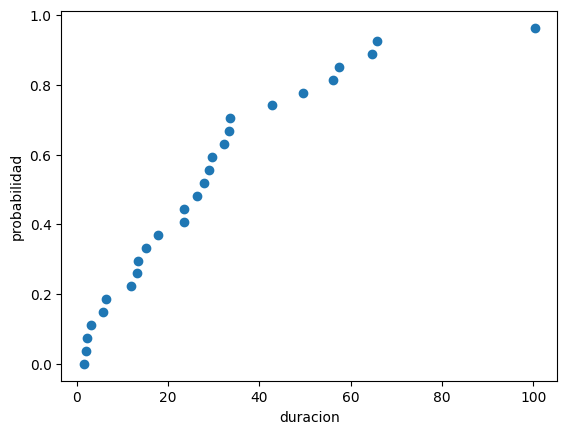

In [22]:
sorted_lamparas:list = lamparas.copy()
sorted_lamparas.sort()

# distribucion acumulada
cantidad_lamparas = len(lamparas)
ecdf:list = [(i/cantidad_lamparas) for i in range(cantidad_lamparas)]

plt.scatter(sorted_lamparas, ecdf)
plt.xlabel("duracion")
plt.ylabel("probabilidad")
plt.show()

[2.c] Completar: Estos datos permiten estimar que el 90% de las lamparas producidas por esta fabrica dura mas de 2.82 horas y el 10% dura menos de 2.82 horas

In [23]:
np.quantile(lamparas, 0.1)

2.8200000000000003

## [3] Ejercicio Graduados

El archivo graduados.txt, contiene los promedios obtenidos en su carrera de grado de 30 inscriptos en el programa de postgrado del Departamento de Ingenieria Industrial e Investigacion Operativa de la Universidad de Berkeley, California.

In [24]:
promedios:list = []
with open("datasets/graduados.txt", 'r') as file:
    for line in file.readlines():
        if len(line) > 2:
            promedios.append(float(line[:-2]))
        pass
    pass

[3.a] Calcular la media muestral y la mediana muestra

Media muestral $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$


In [25]:
print("Media Muestral Numpy: ", np.mean(promedios))
print("Media Muestral Implementada: ", media_muestral(promedios))

Media Muestral Numpy:  3.68
Media Muestral Implementada:  3.68


Mediana muestral $\tilde X$

$\forall k \in \Z$,

$\tilde X= \left\{ \begin{array}{lcc}
             \frac{x^{(k)} + x^{(k+1)}}{2} &   si  & n = 2k\\
             \\ x^{(k+1)} & si & n = 2k + 1
             \end{array}
   \right.$


In [26]:
def mediana_muestral(lss:list) -> float:
    n:int = len(lss)
    lss.sort()
    if n%2 == 0:
        return (lss[int((n-1)/2)] + lss[int(n/2)]) / 2
    else:
        return lss[int((n-1)/2)]

In [27]:
print("Mediana Muestral Implementado: ", mediana_muestral(promedios))
print("Mediana Muestral Numpy: ", np.median(promedios))

Mediana Muestral Implementado:  3.7
Mediana Muestral Numpy:  3.7


[3b] Calcular el desvio estandar muestral y la distancia intercuartil

In [28]:
desvio_estandar:float = np.sqrt(varianza_muestral(promedios, media_muestral=3.7))
print("STD Implementado: ", desvio_estandar)
print("STD Numpy: ", np.std(promedios))

STD Implementado:  0.15536386656646636
STD Numpy:  0.15143755588800725


In [29]:
distancia_intercuartil:float = np.quantile(promedios, 0.75) - np.quantile(promedios, 0.25)
distancia_intercuartil

0.19999999999999973

[3c] Realizar un histograma con los datos y superponga la curva de una densidad normal con los parametros que considere pertinentes

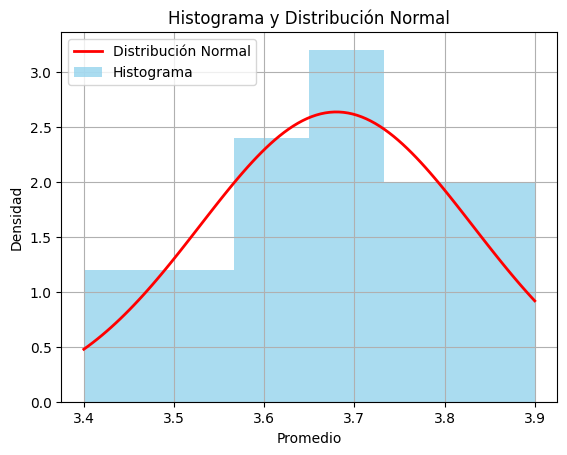

In [30]:
# Grafico histograma
plt.hist(promedios, bins=6, density=True, alpha=0.7, color='skyblue')

# Grafico la distribución normal N(3.68, 0.15^2)
mu = np.mean(promedios)  # media
sigma = np.std(promedios)  # desviación estándar

# Calcular la función de densidad de una distribución normal
x = np.linspace(min(promedios), max(promedios), 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Crear gráfico de la distribución normal
plt.plot(x, y, color='red', linewidth=2)

# Configuraciones del gráfico
plt.xlabel('Promedio')
plt.ylabel('Densidad')
plt.title('Histograma y Distribución Normal')
plt.legend(['Distribución Normal', 'Histograma'])
plt.grid(True)

plt.show()

[3.d] Realice un boxplot con este conjunto de datos. ¿Cuales son sus caracterısticas mas sobresalientes? ¿Como relaciona lo observado en los graficos con los valores estimados de media y mediana obtenidos en a)? ¿Hay outliers?

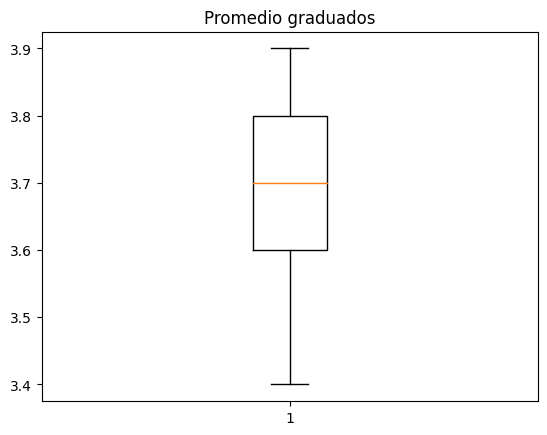

In [31]:
plt.boxplot(promedios)
plt.title("Promedio graduados")
plt.show()

> ¿Cuáles son sus características más sobresalientes? 
<br>
La muestra es bastante simétrica pues la línea dentro del rectángulo se encuentra casi en la mitad del mismo.

> ¿Cómo relaciona lo observado en los gráficos con los valores estimados de media y mediana obtenidos en a)?
<br>
Tiene sentido. El histograma muestra mayor densidad alrededor de la media, y de forma similar, el boxplot también está bastante centrado en la media.

> ¿Hay outliers?
<br>
No, porque no aparece ningún punto suelto en el boxplot.

[3.e] ¿Que distribucion podrıa suponer que tienen estos datos?

$X$ ~ $N(\mu=3.68, \sigma^2=0,02)$

[3.f] Superponer en el histograma la curva de una densidad apropiada con los parametros que considere pertinentes. Explorar el comando density en R


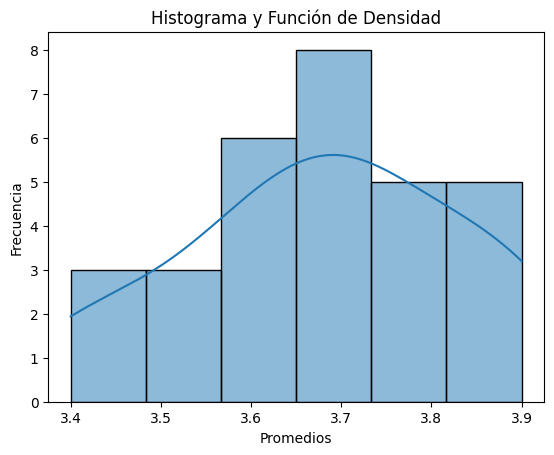

In [32]:
sns.histplot(promedios, kde=True) #kde grafica la curva de densidad

plt.xlabel('Promedios')
plt.ylabel('Frecuencia')
plt.title('Histograma y Función de Densidad')
plt.show()

[3.g] ¿Que otro grafico conoce que le permitiria verificar si su conjetura es razonable? 

> QQ-Plot

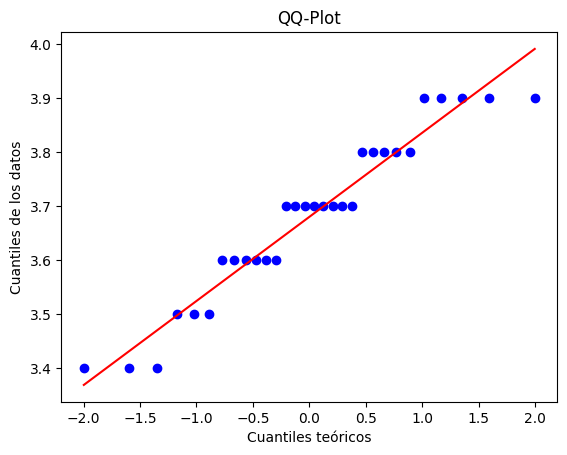

In [107]:
stats.probplot(promedios, dist='norm', plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('QQ-Plot')
plt.show()

## Esta mal, encontrar error!

## [4] Ejercicio Ciudades

La siguiente tabla contiene valores de poblacion, en cientos de miles, de las 10 ciudades mas pobladas de 4 paıses en el a˜no 1967. Estos datos se encuentran en el archivo ciudades.txt

In [33]:
ciudades_lss:list = []
with open('datasets/ciudades.txt', 'r') as file:

    header_line:str = file.readline()

    headers:list = []
    pais:str = ""

    for i, char in enumerate(header_line):
        if char == ' ' or i == len(header_line)-1:
            if len(pais) > 0:
                headers.append(pais)
            pais:str = ""
        else:
            pais += char

    for line in file.readlines():
        vals_lss:list = []
        val:str = ""
        for i, char in enumerate(line):
            if char == ' ' or i == len(line)-1:
                if len(val) > 0:
                    vals_lss.append(float(val))
                val:str = ""
            else:
                val += char
        
        if len(vals_lss) != len(headers):
            raise Exception("Error de lectura, la tupla debe tener la misma cantidad \
                            de elementos que el header")
        ciudades_lss.append(tuple(vals_lss))

ciudades:pd.DataFrame = pd.DataFrame(ciudades_lss, columns=headers)
ciudades

,Argentina,EEUU,Holanda,Japon
0,29.66,77.81,8.68,110.21
1,7.61,35.50,7.31,32.14
2,6.35,24.79,6.02,18.88
3,4.10,20.02,2.64,16.38
4,3.80,16.70,1.75,13.37
5,2.75,9.39,1.72,11.92
6,2.70,9.38,1.51,10.71
7,2.69,8.76,1.42,7.80
8,2.51,7.63,1.31,7.70
9,2.44,7.50,1.29,7.00


[4.1] Construir en paralelo, para facilitar la comparacion, un boxplot para los datos de cada pais e identificar los puntos extremos en cada uno de ellos

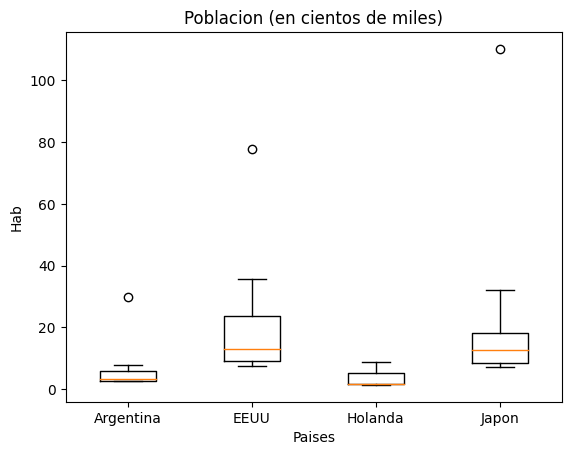

In [34]:
plt.boxplot(ciudades)

plt.xlabel('Paises')
plt.ylabel('Hab')
plt.title('Poblacion (en cientos de miles)')

plt.xticks([1, 2, 3, 4], headers)
plt.show()

[4.b] Comparar los centros de cada poblacion, sus dispersiones y su simetrıa. ¿Cual dirıa que es el paıs mas homogeneamente habitado?

In [35]:
ciudades.describe()

,Argentina,EEUU,Holanda,Japon
count,10.000000,10.000000,10.000000,10.000000
mean,6.461000,21.748000,3.365000,23.611000
std,8.340645,21.721691,2.837328,31.329551
min,2.440000,7.500000,1.290000,7.000000
25%,2.692500,8.915000,1.442500,8.527500
50%,3.275000,13.045000,1.735000,12.645000
75%,5.787500,23.597500,5.175000,18.255000
max,29.660000,77.810000,8.680000,110.210000


El pais mas homogeneamente poblado es aquel que:
- Tiene menor desvio estandar
- Tiene menos outliners

Luego...

In [36]:
ciudades.std().sort_values()

Holanda       2.837328
Argentina     8.340645
EEUU         21.721691
Japon        31.329551
dtype: float64

Holanda es el pais mas homogeneamente poblado.

## [5] Ejercicio Ingresos

El archivo ingresos.txt contiene el ingreso mensual de un conjunto de 1000 trabajadores registrados de una ciudad, en miles de pesos.

In [37]:
with open('datasets/ingresos.txt', 'r') as file:
    ingresos_lss:list = [(float(line[:-1])) for line in file.readlines()]

ingresos:pd.DataFrame = pd.DataFrame(ingresos_lss, columns=['salario'])
ingresos.head(9)

,salario
0,15.00000
1,15.00000
2,15.00000
3,15.00000
4,15.00000
5,15.00000
6,44.92196
7,15.00000
8,304.91670


[5.b] ¿Cual es el ingreso mınimo percibido por los trabajadores encuestados? Estimar la proporcion de los trabajadores de la ciudad que percibe el ingreso mınimo.

In [38]:
ingreso_minimo = min(ingresos_lss)
ingreso_minimo

15.0

In [39]:
len(ingresos[ingresos.salario == 15]) / len(ingresos)

0.461

Alrededor de un 46% de trabajadores cobra el salario minimo ($15000)

[5.c] Estimar el ingreso mensual que se necesita para pertenecer al 10% de trabajadores de la ciudad con ingresos mas altos.

In [40]:
ingresos.quantile(0.9)

salario    240.54083
Name: 0.9, dtype: float64

Se necesita un salario de $240540,80 para pertenecer al 10% con mas ingresos.

[5.d] Calcular la media muestral, la mediana muestral y la media α-podada con $\alpha=0.10$ (10 %).

In [41]:
def media_alpha_podada(lss:list, alpha:float) -> float:
    lss.sort()
    cut_trims:int = int(alpha * len(lss))
    trim_lss:list = lss[cut_trims:-cut_trims]
    df = pd.DataFrame(trim_lss)
    return list(df.mean())[0]

In [42]:
print("Media Muestral")
print("* Implementado: ", media_muestral(ingresos_lss))
print("* Pandas: ", list(ingresos.mean())[0])

print()
print("Mediana Muestral")
print("* Implementado: ", mediana_muestral(ingresos_lss))
print("* Pandas: ", list(ingresos.median())[0])

print()
print("Media alpha-podada")
print("* Implementado: ", media_alpha_podada(ingresos_lss, 0.1))
print("* Scipy.stats: ", stats.trim_mean(ingresos, 0.1)[0])

Media Muestral
* Implementado:  87.17647990999995
* Pandas:  87.17647991

Mediana Muestral
* Implementado:  18.473715
* Pandas:  18.473715

Media alpha-podada
* Implementado:  49.9308686375
* Scipy.stats:  49.9308686375


[5.e] Calcular el desvio estandar muestral y la distancia intercuartil.

In [43]:
std = list(ingresos.std())[0]
std

152.0336284840572

In [44]:
IQR = list(ingresos.quantile(0.75) - ingresos.quantile(0.25))[0]
IQR

74.97330249999999

[5.f] Realizar un histograma y un boxplot. ¿Cuales son las caracterısticas mas sobresalientes? ¿Hay outliers?

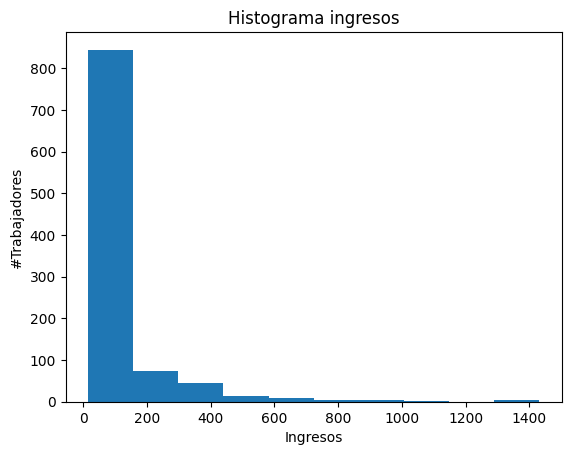

In [45]:
plt.hist(ingresos)
plt.xlabel("Ingresos")
plt.ylabel("#Trabajadores")
plt.title("Histograma ingresos")
plt.show()

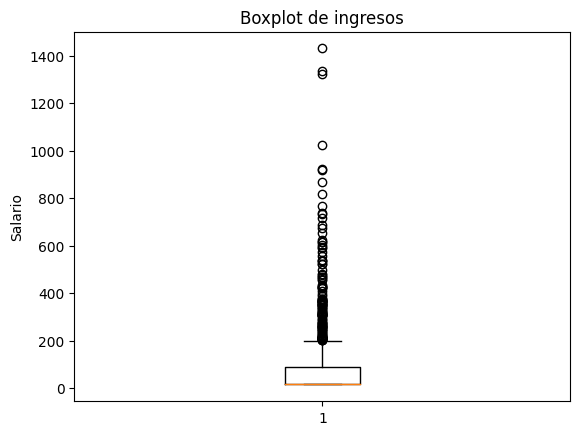

In [46]:
plt.boxplot(ingresos)
plt.title("Boxplot de ingresos")
plt.ylabel("Salario")
plt.show()

Mirando los graficos se puede ver que hay una mayoria con salarios entre 15 a 200 mil, con una mediana baja dentro de la IQR. 

Asi como tambien hay varios outliers que cobran mucho mas.

[5.f] ¿Cree que los datos podrıan provenir de una poblacion con distribucion normal?

* No, tiene una forma mas similar a una distribucion con decaimiento exponencial $e^{-f(x)}$

## [6] Ejercicio QQ-PLOTS

[6.1] Generar muestras de tamaño 25, 50 y 100 de una variable con distribucion normal. 

Construir QQ–plots para cada una de ellas. Repetir con diferentes semillas.

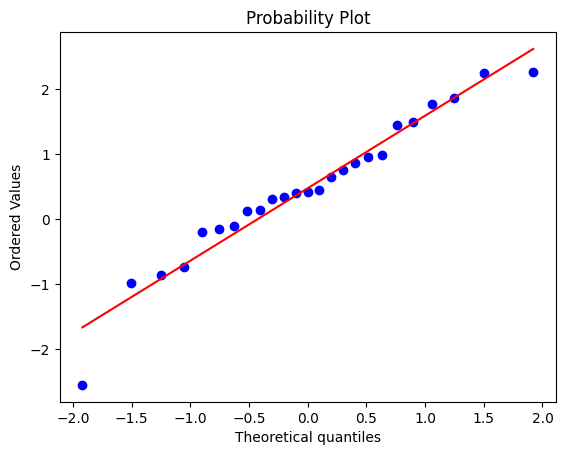

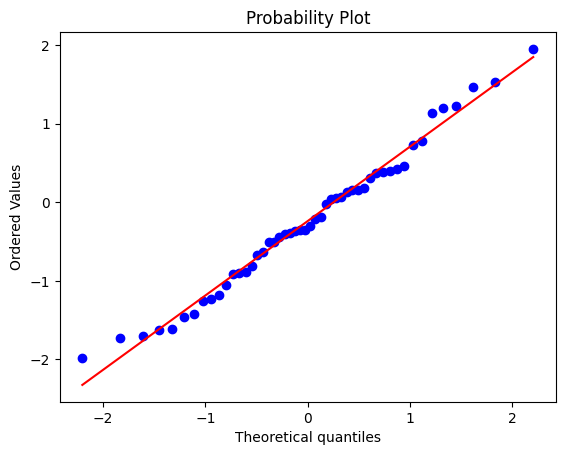

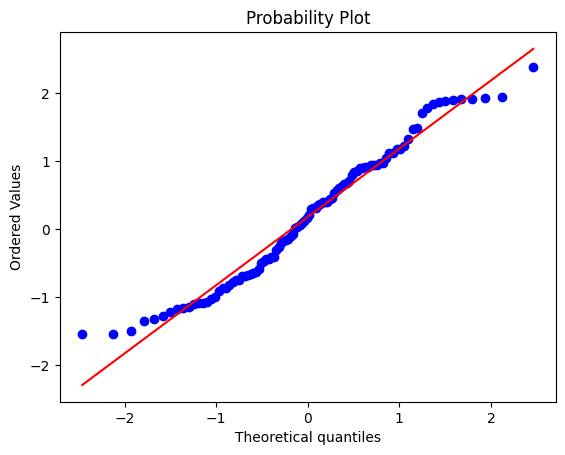

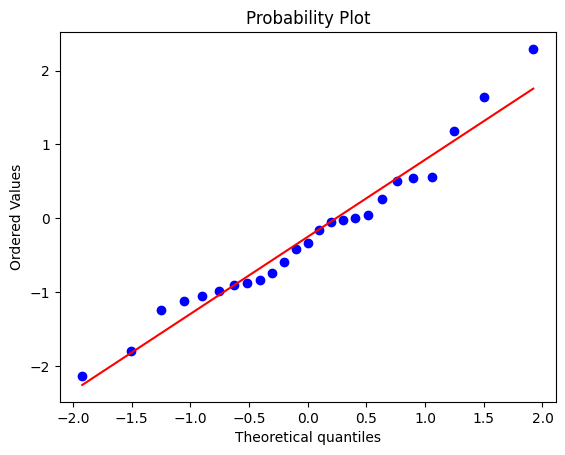

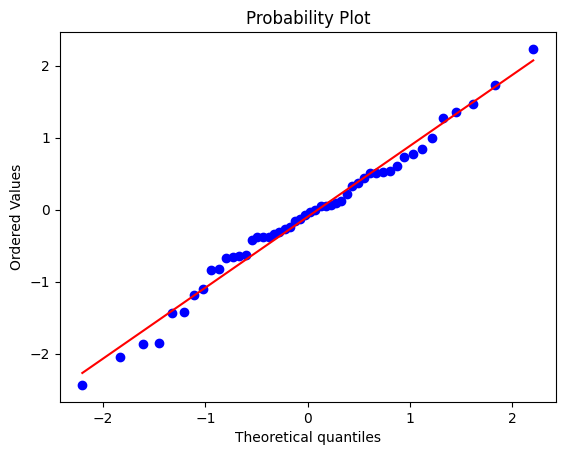

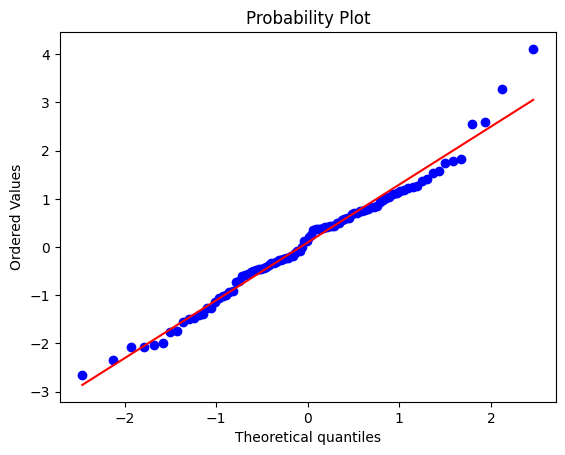

In [104]:
for seed in [0,2]:
    np.random.seed(seed)
    sizes:list = [25, 50, 100]

    for size in sizes:
        muestra:list = np.random.normal(0, 1, size)
        stats.probplot(muestra, dist='norm', plot=plt)
        plt.show()

[6.b] Repetir [a] para una variable con distribucion $Γ(5,0.5)$

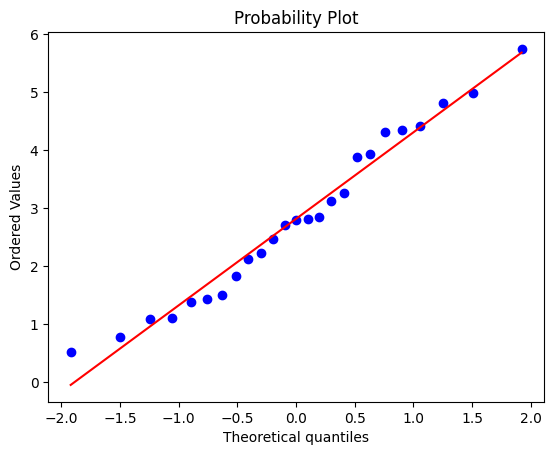

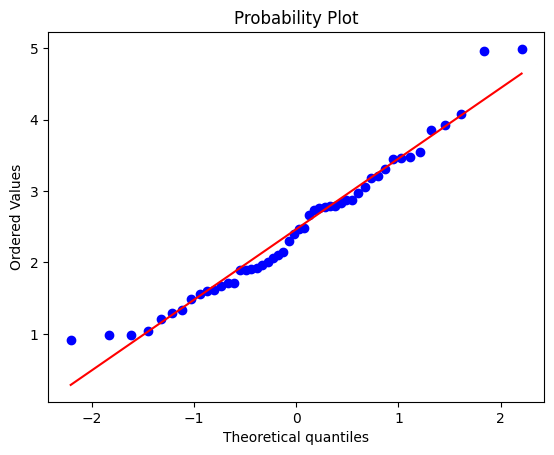

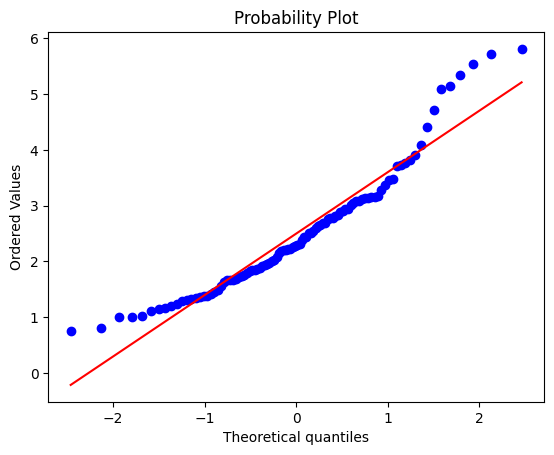

In [100]:
for seed in [0]:
    np.random.seed(seed)
    sizes:list = [25, 50, 100]

    for size in sizes:
        muestra:list = np.random.gamma(5, 0.5, size)
        stats.probplot(muestra, dist='norm', plot=plt)
        plt.show()

[6.c] Repetir para $Y=Z/U$ donde $Z$ ∼ $N(0, 1)$ y $U$ ∼ $U(0, 1)$ independientes.

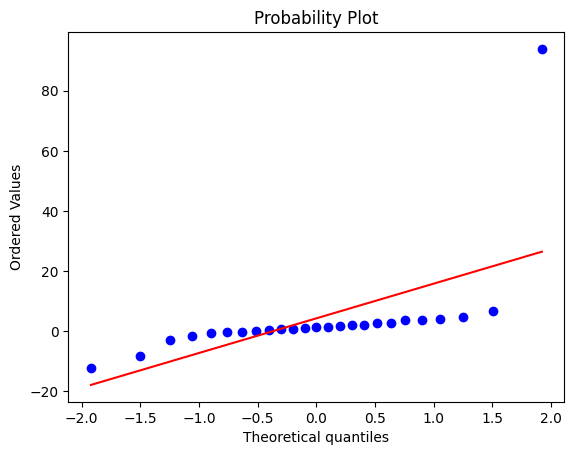

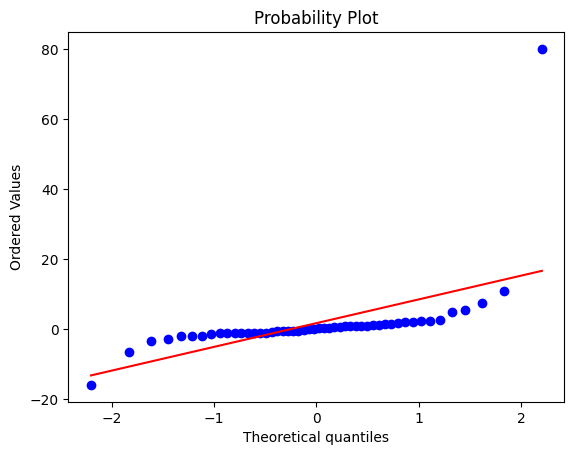

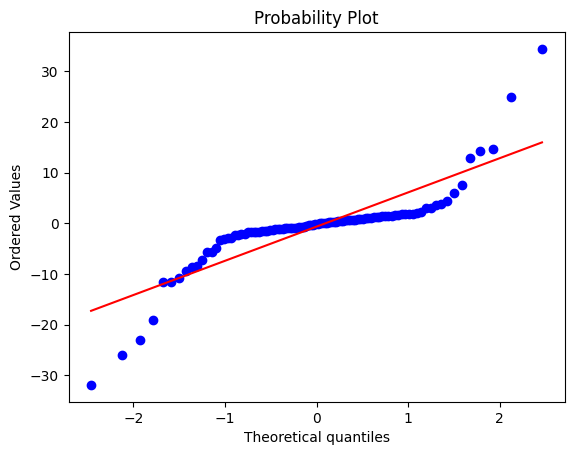

In [101]:
for seed in [0]:
    np.random.seed(seed)
    sizes:list = [25, 50, 100]

    for size in sizes:
        muestra:list = np.random.normal(0, 1, size) / np.random.uniform(0,1,size)
        stats.probplot(muestra, dist='norm', plot=plt)
        plt.show()

[6.d] Repetir [a] para una variable con distribucion uniforme.


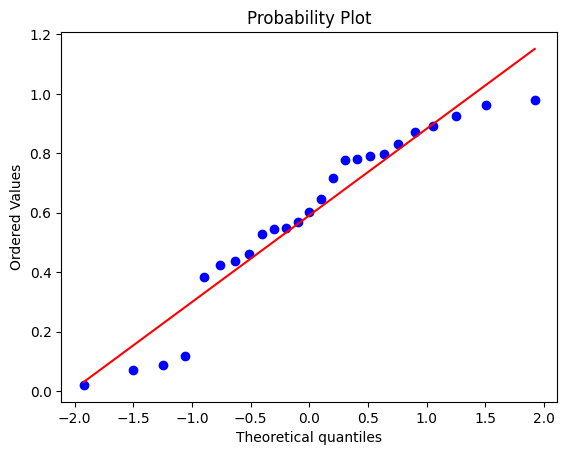

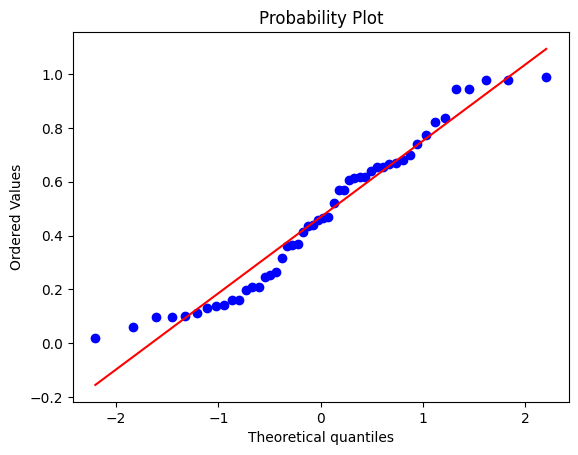

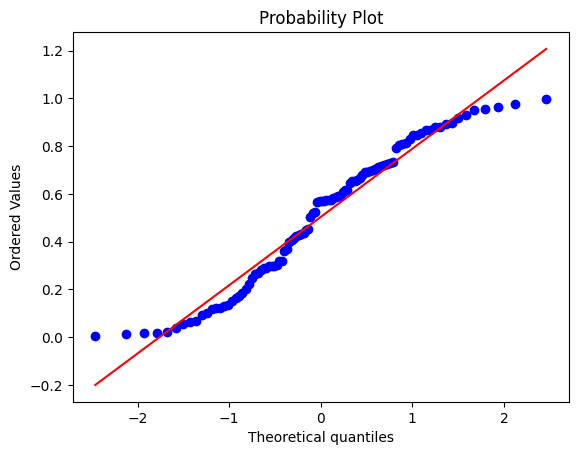

In [102]:
for seed in [0]:
    np.random.seed(seed)
    sizes:list = [25, 50, 100]

    for size in sizes:
        muestra:list = np.random.uniform(0, 1, size)
        stats.probplot(muestra, dist='norm', plot=plt)
        plt.show()

[6.e] Repetir [a] para una variable con distribucion exponencial.


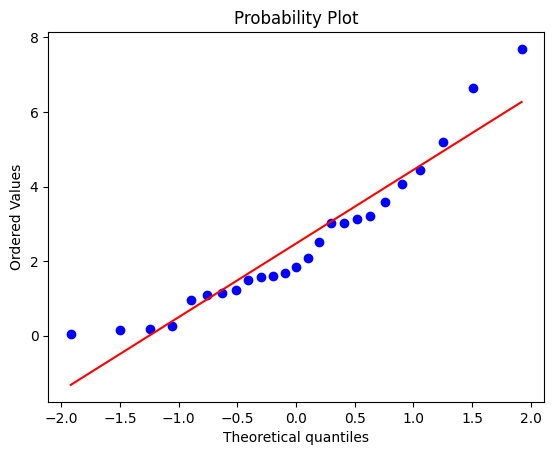

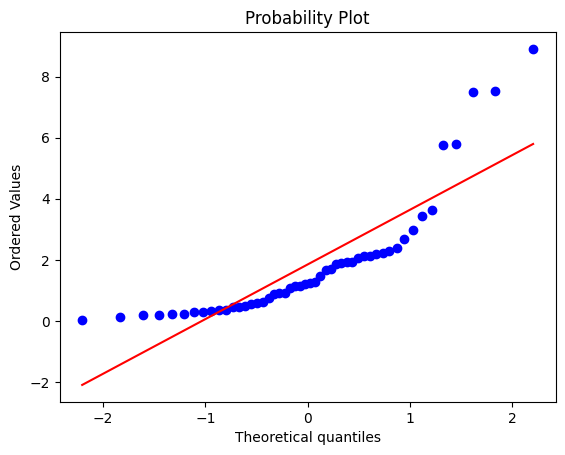

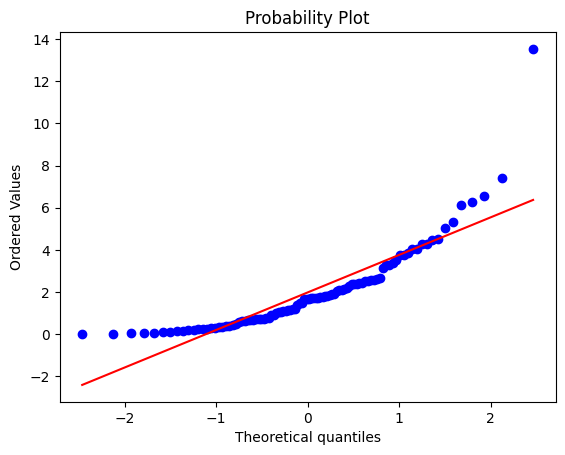

In [103]:
for seed in [0]:
    np.random.seed(seed)
    sizes:list = [25, 50, 100]

    for size in sizes:
        muestra:list = np.random.exponential(2, size)
        stats.probplot(muestra, dist='norm', plot=plt)
        plt.show()

## [7] Ejercicio Metricas de Error

Generar un conjunto de $n = 10$ datos provenientes de una distribucion cualquiera. 

Llamemoslos ${x_1, . . . , x_n}$.

[7.1] Implementar y graficar la funcion $l_2$ que, a cada $c$ le asigna $l_2(c) = \sum_{i=1}^{n}(x_i-c)^2$

¿Para que valor o valores de $c$ se minimiza la funcion?
* Experimentar con otros valores de $n$.
* Conjeturar una respuesta y luego hacer la demostracion para probar su conjetura

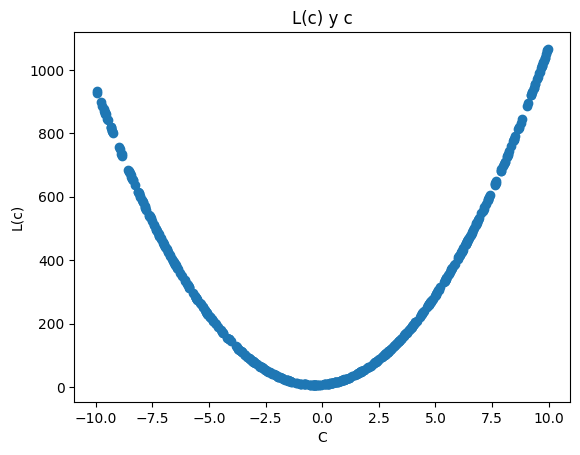

In [128]:
n = 10
x = np.random.normal(0, 1, n)
l2 = lambda c: sum([(x[i] - c)**2 for i in range(10)])
base_l2 = np.random.uniform(-10,10,500)
y = [l2(c) for c in base_l2]

plt.scatter(base_l2, y)
plt.ylabel("L(c)")
plt.xlabel("C")
plt.title("L(c) y c")
plt.show()

In [129]:
base_l2[y.index(min(y))]

-0.3264582887497465

#### <u>Conjetura:</u> 

> Sea una muestra ${x_1, ..., x_n}$ de v.a. i.i.d con: <br>
> * $x_i$ ~ $F$, <br>
> * $\mu_x = E(x_i), \sigma^2 = V(x_i)$ finitas <br>

>Entonces $l_2(c) = \sum_{i=1}^n (x_i-c)^2$ se minimiza para $c = \mu_x$ <br>

#### <u>Demostracion:</u> 

Para $\lim n \rightarrow \inf$:

$l_2(c) = \sum_{i=1}^n (x_i - c)^2 = \sum_{i=1}^n x_i^2 - 2cx_i + c^2 =
          \sum_{i=1}^n x_i^2 - 2c\sum_{i=1}^n x_i + c^2\sum_{i=1}^n 1 =
          \sum_{i=1}^n x_i^2 - 2c\sum_{i=1}^n x_i + nc^2$

Luego podemos estimar [a] $\sum_{i=1}^n x_i^2$ y [b] $\sum_{i=1}^n x_i$ por el TCL:

> [a] <br><br>
> $\sum_{i=1}^n x_i$ ~ $N(\mu=n\mu_x, \sigma^2=n\sigma^2)$ <br> <br>
> Porque:
> * $E(\sum_{i=1}^n x_i) = \sum_{i=1}^n E(x_i) = n\mu_x$
> * $V(\sum_{i=1}^n x_i) = \sum_{i=1}^n V(x_i) = n\sigma^2$

> [b] <br><br>
> $\sum_{i=1}^n x_i^2 \rightarrow n(\sigma^2 + \mu^2)$ <br> <br>
> Porque:
> * $E(\sum_{i=1}^n x_i^2) = \sum_{i=1}^n E(x_i^2) = n(\sigma^2 +\mu^2)$
> * $E(x_i^2) = V(x_i) + E(x_i)^2$

Entonces: 

Para $\lim n \rightarrow \inf$:

$l_2(c) \approx \sum_{i=1}^n x_i^2 - 2c\sum_{i=1}^n x_i + nc^2
        = n(\sigma^2 +\mu^2) - 2cn\mu + nc^2$ <br>
$l_2(c) \approx n\sigma^2 + n\mu^2 - 2cn\mu + nc^2 $

Luego, buscamos minimizar $l_2(c)$ entonces miramos los puntos criticos: 

> $\frac{\partial}{\partial c} l_2(c) = -2n\mu +2nc = 2n(c-\mu) = 0$ <br>
> $\leftrightarrow c = \mu$ 

Concluyo, para $\lim n \rightarrow \inf$, $l_2(c)$ tiene minimo en $c = \mu$.


[7.1] Simil para $l_1(c) = \sum_{i=1}^{n} |x_i-c|$

¿Para que valor o valores de $c$ se minimiza la funcion?
* Experimentar con otros valores de $n$.
* Conjeturar una respuesta y luego hacer la demostracion para probar su conjetura

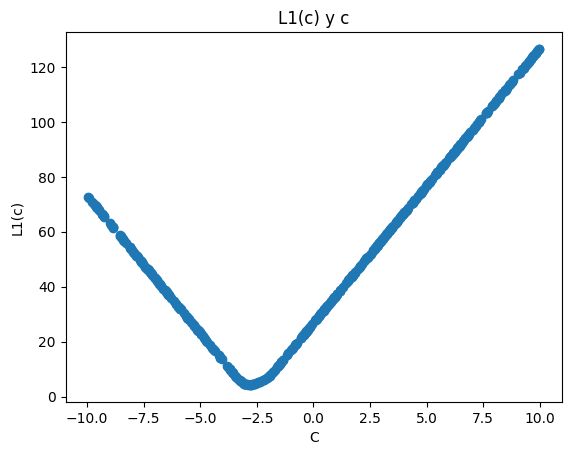

In [133]:
n = 10
x = np.random.normal(-2.5, 1, n)
l1 = lambda c: sum([abs(x[i] - c) for i in range(10)])
y = [l1(c) for c in base_l2]

plt.scatter(base_l2, y)
plt.ylabel("L1(c)")
plt.xlabel("C")
plt.title("L1(c) y c")
plt.show()

conjetura similar a [7.1] ... terminar

## [8] Ejercicio Propiedades de la Media y Mediana Muestral

Sean $X_1, . . . , X_n$ una muestra aleatoria de una población cualquiera.

[8.a] Sean $\bar{X}$ y $\tilde{X}$ la media y la mediana muestral, respectivamente.
* [i] Si se suma una constante $c$ a cada uno de los $x_i$ de la muestra, obteniendose $Y_i = X_i + c$,
¿Como se relacionan $\bar{X}$ con $\bar{Y}$ y $\tilde{X}$ con $\tilde{Y}$?
* [ii] Si cada $X_i$ es multiplicado por una constante $c$, obteniendose $Y_i = cX_i$, responder a la pregunta planteada en [i].

[8.a.i] Caso $Y_i = X_i + c$

Media Muestral $\bar Y$
> $\bar{Y} = \frac{1}{n}\sum_{i=1}^n(x_i + c) = \frac{1}{n}(\sum_{i=1}^n x_i + c\sum_{i=1}^n 1)
           = \frac{\sum_{i=1}^n x_i}{n} + C = \bar{X} + c$ <br>
> $\rightarrow \bar{Y} = \bar{X} + c$

Mediana Muestral $\tilde Y$

> $\forall k \in \Z$, <br>
> $\tilde Y = \left\{ \begin{array}{lcc}
             \frac{x^{(k)} + x^{(k+1)} + 2c}{2} &   si  & n = 2k\\
             \\ x^{(k+1)} + c & si & n = 2k + 1
             \end{array}
   \right.$

Luego vale para cada caso: 
> Caso n par:<br> 
> $\tilde Y = \frac{x^{(k)} + x^{(k+1)} + 2c}{2} = \tilde X + c$ 

> Caso n impar:<br> 
> $\tilde Y = x^{(k+1)} + c = \tilde X + c$ 

Entonces $\forall n \in \Z_{>0} \rightarrow \tilde Y = \tilde X + c$ 

[8.a.ii] Caso $Y_i = cX_i$

Media Muestral $\bar Y$
> $\bar{Y} = \frac{1}{n}\sum_{i=1}^n(c x_i) = \frac{c}{n}\sum_{i=1}^n x_i
           = c\bar{X}$ <br>
> $\rightarrow \bar{Y} = c\bar{X}$

Mediana Muestral $\tilde Y$

> $\forall k \in \Z$, <br>
> $\tilde Y = \left\{ \begin{array}{lcc}
             \frac{cx^{(k)} + cx^{(k+1)}}{2} &   si  & n = 2k\\
             \\ cx^{(k+1)} + c & si & n = 2k + 1
             \end{array}
   \right.$

Luego vale para cada caso: 
> Caso n par:<br> 
> $\tilde Y = c \frac{(x^{(k)} + x^{(k+1)})}{2} = c \tilde X$ 

> Caso n impar:<br> 
> $\tilde Y = cx^{(k+1)} = c \tilde X$ 

Entonces $\forall n \in \Z_{>0} \rightarrow \tilde Y = c\tilde X$ 

[8.b] Sea $S_x^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar X)^2$ la varianza muestral correspondiente a la muestra.
Demostrar que:

* [i] Para $c$ constante, $Y_i = c + X_i \rightarrow S_y^2 = S_x^2$ 

* [ii] Para $c$ constante, $Y_i = cX_i \rightarrow S_y^2 = c^2S_x^2$ 

* [iii] $S_x^2 = \frac{1}{n-1} \sum_{i=1}^n X_i^2 - \frac{n}{n-1} \bar X^2$ 

[8.b.1]

$S_y^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar Y)^2
       = \frac{1}{n-1} \sum_{i=1}^n (X_i + c - (\bar X + c))^2
       = \frac{1}{n-1} \sum_{i=1}^n (X_i - (\bar X))^2
       = S_x^2
$ 

[8.b.2]

$S_y^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar Y)^2
       = \frac{1}{n-1} \sum_{i=1}^n (cX_i - (c \bar X))^2$<br>
$S_y^2 = \frac{1}{n-1} \sum_{i=1}^n (c^2X_i^2 - 2c^2X_i(\bar X) + c^2\bar X^2)$<br>
$S_y^2 = c^2 \frac{1}{n-1} \sum_{i=1}^n (X_i^2 - 2X_i(\bar X) + \bar X^2)$<br>
$S_y^2 = c^2 (\frac{1}{n-1} \sum_{i=1}^n (X_i - \bar X)^2)$ <br>
$S_y^2 = c^2 S_x^2$

 
